In [1]:
%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')

import os
from scipy.stats import ttest_ind

blue = sns.color_palette('Blues')[-3]
red =  sns.color_palette('Reds')[-3]
grey= sns.color_palette('Greys')[-3]

def jitterbox(**kwargs):
    'supply x, y, hue, data'
    sns.stripplot(**kwargs, dodge=True, alpha=0.5,zorder=0)
    ax = sns.boxplot(**kwargs, dodge=True, fliersize=0, zorder=10, boxprops = dict(facecolor=(0,0,0,0)))

    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1, 1), frameon=False)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_json('KaiB_feats_3recycles.json.zip')
df['cluster_ind'] = [os.path.basename(x.replace('.pdb','')).split('_')[-1] for x in df['pdb']]

def get_type(pdb):
    end = pdb.split('_')[-1]
    if end=='REF.pdb':
        return 'REF'
    elif end.startswith('U'):
        return end.split('-')[0]
    else:
        return 'Tree'
    
df['Type'] = df.apply(lambda row: get_type(row['pdb']), axis=1)

In [3]:
def get_msaT(cluster_ind):
    return np.loadtxt('msaT_preds/msa_t__2QKEE_%s.npy' % cluster_ind)

tree_df = df.loc[df.Type=='Tree']
tree_df['msaT_arr'] = tree_df.apply(lambda row: get_msaT(row['cluster_ind']), axis=1)

/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_81485/4028131838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['msaT_arr'] = tree_df.apply(lambda row: get_msaT(row['cluster_ind']), axis=1)


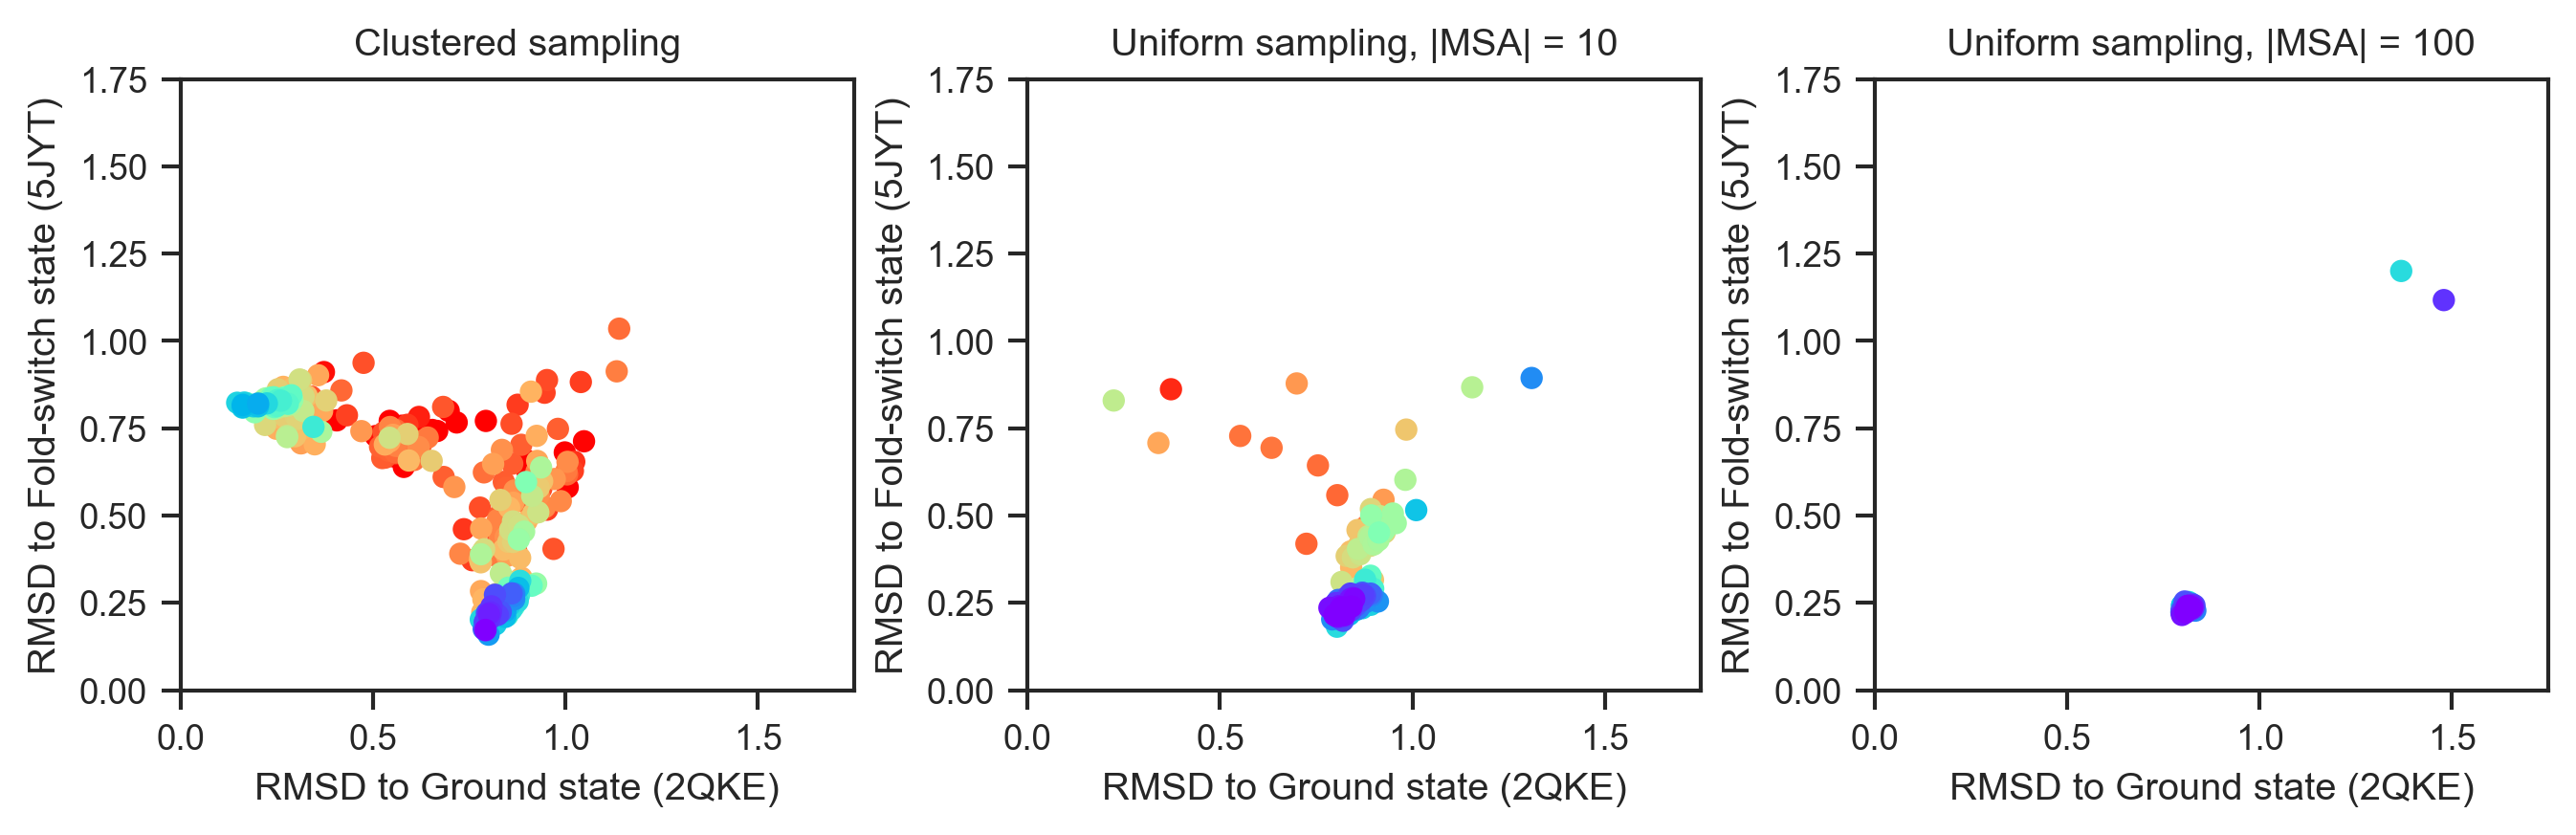

In [4]:
figure(figsize=(9,3))

df = df.sort_values('mean_pLDDT')
maxx=1.75
subplot(1,3,1)

tmp = df.loc[df.Type=='Tree']
scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'], c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)

#colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to Ground state (2QKE)')
ylabel('RMSD to Fold-switch state (5JYT)')

xlim([0,maxx])
ylim([0,maxx])
title('Clustered sampling')

subplot(1,3,2)

tmp = df.loc[df.Type=='U10']
scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'], c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)

title('Uniform sampling, |MSA| = 10')
#colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to Ground state (2QKE)')
ylabel('RMSD to Fold-switch state (5JYT)')

xlim([0,maxx])
ylim([0,maxx])
#

subplot(1,3,3)

tmp = df.loc[df.Type=='U100']
scatter(tmp['rmsd_ref_2QKEE'], tmp['rmsd_ref_5JYTA'], c=tmp['mean_pLDDT'], cmap='rainbow_r',vmin=50,vmax=90)
title('Uniform sampling, |MSA| = 100')

#colorbar(aspect=3.5,label='MSA size',fraction=0.05,orientation='horizontal',ticks=[1e1,1e2,1e3])
xlabel('RMSD to Ground state (2QKE)')
ylabel('RMSD to Fold-switch state (5JYT)')

xlim([0,maxx])
ylim([0,maxx])
tight_layout()

#savefig('kaib_landscape.pdf',bbox_inches='tight')

1041
67


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_92247/3807696534.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bkgd = df.loc[df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_92247/3807696534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_1['state'] = 'FS state'
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_92247/3807696534.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

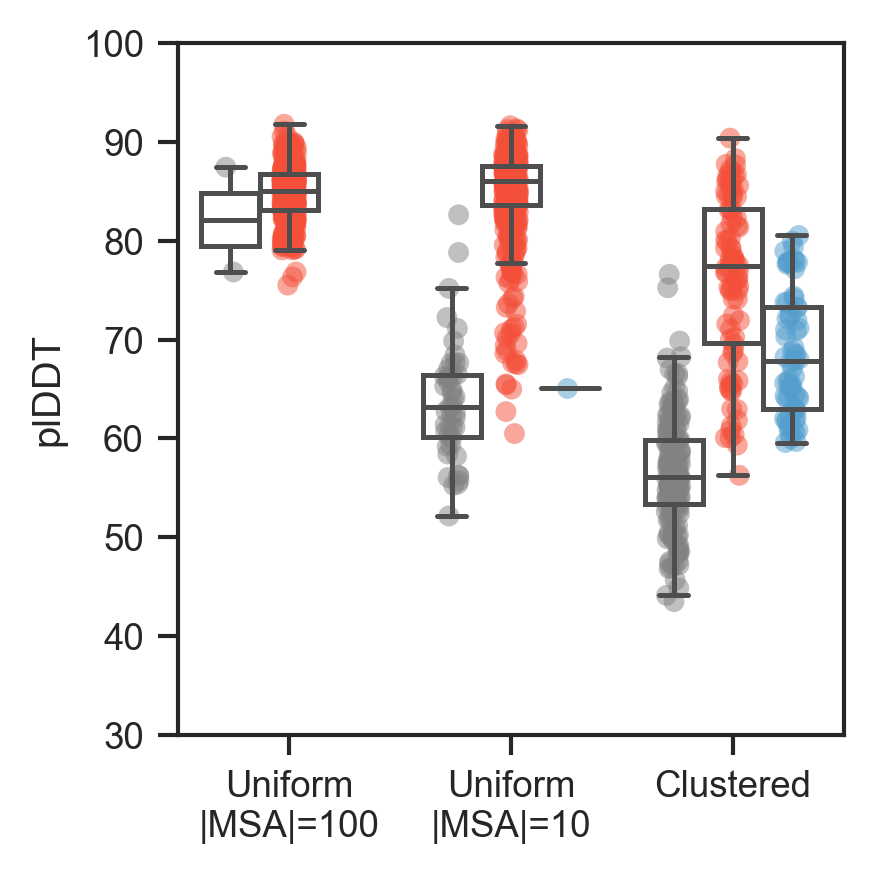

In [3]:
 # get representative clusters of first and second state
state_1 = df.loc[df['rmsd_ref_5JYTA']<0.3] #[df['mean_pLDDT']>87.5]
print(len(state_1))

state_2 = df.loc[df['rmsd_ref_2QKEE']<0.3] #[df['mean_pLDDT']>87.5]
print(len(state_2))

bkgd = df.loc[df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]
state_1['state'] = 'FS state'
state_2['state'] = 'Ground state'
bkgd['state'] = 'Other'

df_w_states = pd.concat([state_1, state_2, bkgd])

figure(figsize=(3,3))

jitterbox(x='Type', y='mean_pLDDT', hue='state', data=df_w_states, 
              order=['U100','U10','Tree'],
              hue_order=['Other', 'FS state', 'Ground state'], palette=[grey, red, blue])
ylabel('plDDT')
ylim([30,100])
xticks(range(3), ['Uniform\n|MSA|=100', 'Uniform\n|MSA|=10', 'Clustered'])
xlabel('')
legend([],frameon=False)

tight_layout()

#savefig('kaib_state_plddts.pdf',bbox_inches='tight')


In [10]:
for typ in df.Type.unique():
    tmp = df_w_states.loc[df_w_states.Type==typ]
    print(typ, 'FS state', ttest_ind(tmp.loc[tmp.state=='FS state']['mean_pLDDT'], tmp.loc[tmp.state=='Other']['mean_pLDDT']))
    print(typ, 'Ground state', ttest_ind(tmp.loc[tmp.state=='Ground state']['mean_pLDDT'], tmp.loc[tmp.state=='Other']['mean_pLDDT']))


Tree FS state Ttest_indResult(statistic=22.35336941178866, pvalue=1.4415818635686552e-62)
Tree Ground state Ttest_indResult(statistic=14.342562004445995, pvalue=5.261573878224075e-34)
U100 FS state Ttest_indResult(statistic=1.466250639098802, pvalue=0.14321115404723958)
U100 Ground state Ttest_indResult(statistic=nan, pvalue=nan)
U10 FS state Ttest_indResult(statistic=27.58123319872883, pvalue=2.8821914376566183e-102)
U10 Ground state Ttest_indResult(statistic=nan, pvalue=nan)


/Users/wayment/opt/miniconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/wayment/opt/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


### Compare AF2 and MSA transformer predictions

In [80]:
import mdtraj as md

def get_contact_map(pdb_file, size=None, start_pos=0, end_pos=-1):
    
    pdb_obj = md.load_pdb(pdb_file)
    distances, pairs = md.compute_contacts(pdb_obj)
    contacts= md.geometry.squareform(distances, pairs)[0]
    if size is None:
        size = contacts.shape[0]
        
    arr=np.zeros([size, size])
    arr[np.where(contacts[start_pos:end_pos, start_pos:end_pos]<0.5)]=1

    return arr

contacts_2qke = get_contact_map('2qkeE.pdb')
contacts_5jyt = get_contact_map('5jytA.pdb')

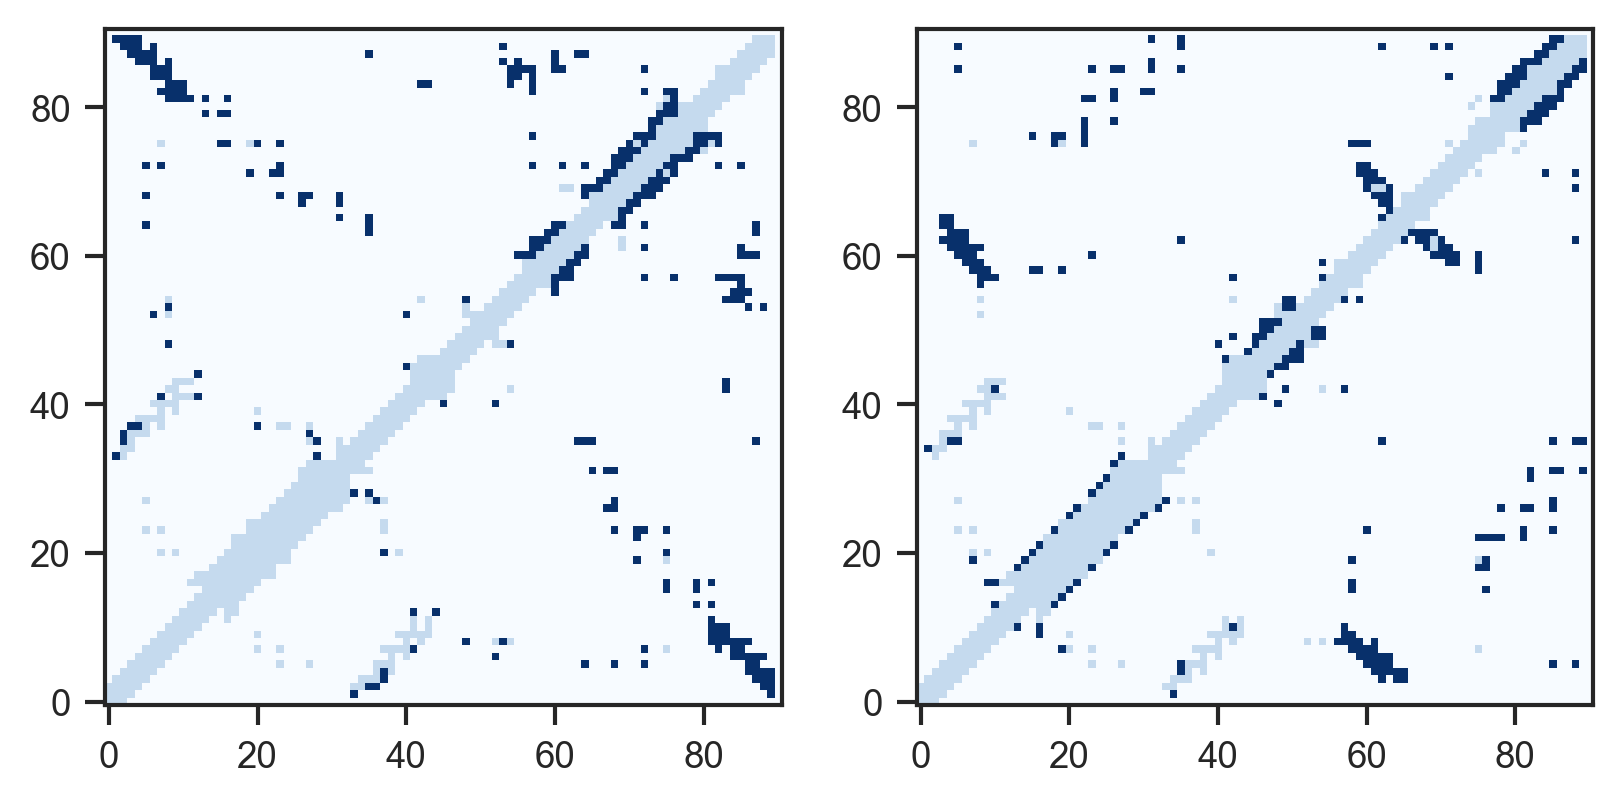

In [85]:
subplot(1,2,1)
imshow(np.clip(contacts_2qke-.75*contacts_5jyt,0,1),origin='lower', cmap='Blues')
subplot(1,2,2)
imshow(np.clip(contacts_5jyt-.75*contacts_2qke,0,1),origin='lower', cmap='Blues')
savefig('differential_contact_maps.pdf',bbox_inches='tight')

In [32]:
def score_contact_map(arr, gt_arr):

    return np.sum(np.multiply(arr, gt_arr))/np.sum(gt_arr)

tree_df['contact_map_msaT_2qke_score'] = tree_df.apply(lambda row: score_contact_map(row['msaT_arr'], np.clip(contacts_2qke-contacts_5jyt,0,1)), axis=1)
tree_df['contact_map_msaT_5jyt_score'] = tree_df.apply(lambda row: score_contact_map(row['msaT_arr'], np.clip(contacts_5jyt-contacts_2qke,0,1)), axis=1)
tree_df['score_ratio'] = tree_df.apply(lambda row: row['contact_map_msaT_5jyt_score']/row['contact_map_msaT_2qke_score'], axis=1)



In [89]:
from scipy.stats import spearmanr, pearsonr

print(spearmanr(tree_df['rmsd_ref_2QKEE'], tree_df['contact_map_msaT_2qke_score']))
print(spearmanr(tree_df['rmsd_ref_5JYTA'], tree_df['contact_map_msaT_5jyt_score']))

SpearmanrResult(correlation=-0.3640744310178664, pvalue=9.502708997427608e-12)
SpearmanrResult(correlation=-0.5489523450083906, pvalue=2.7439759053772158e-27)


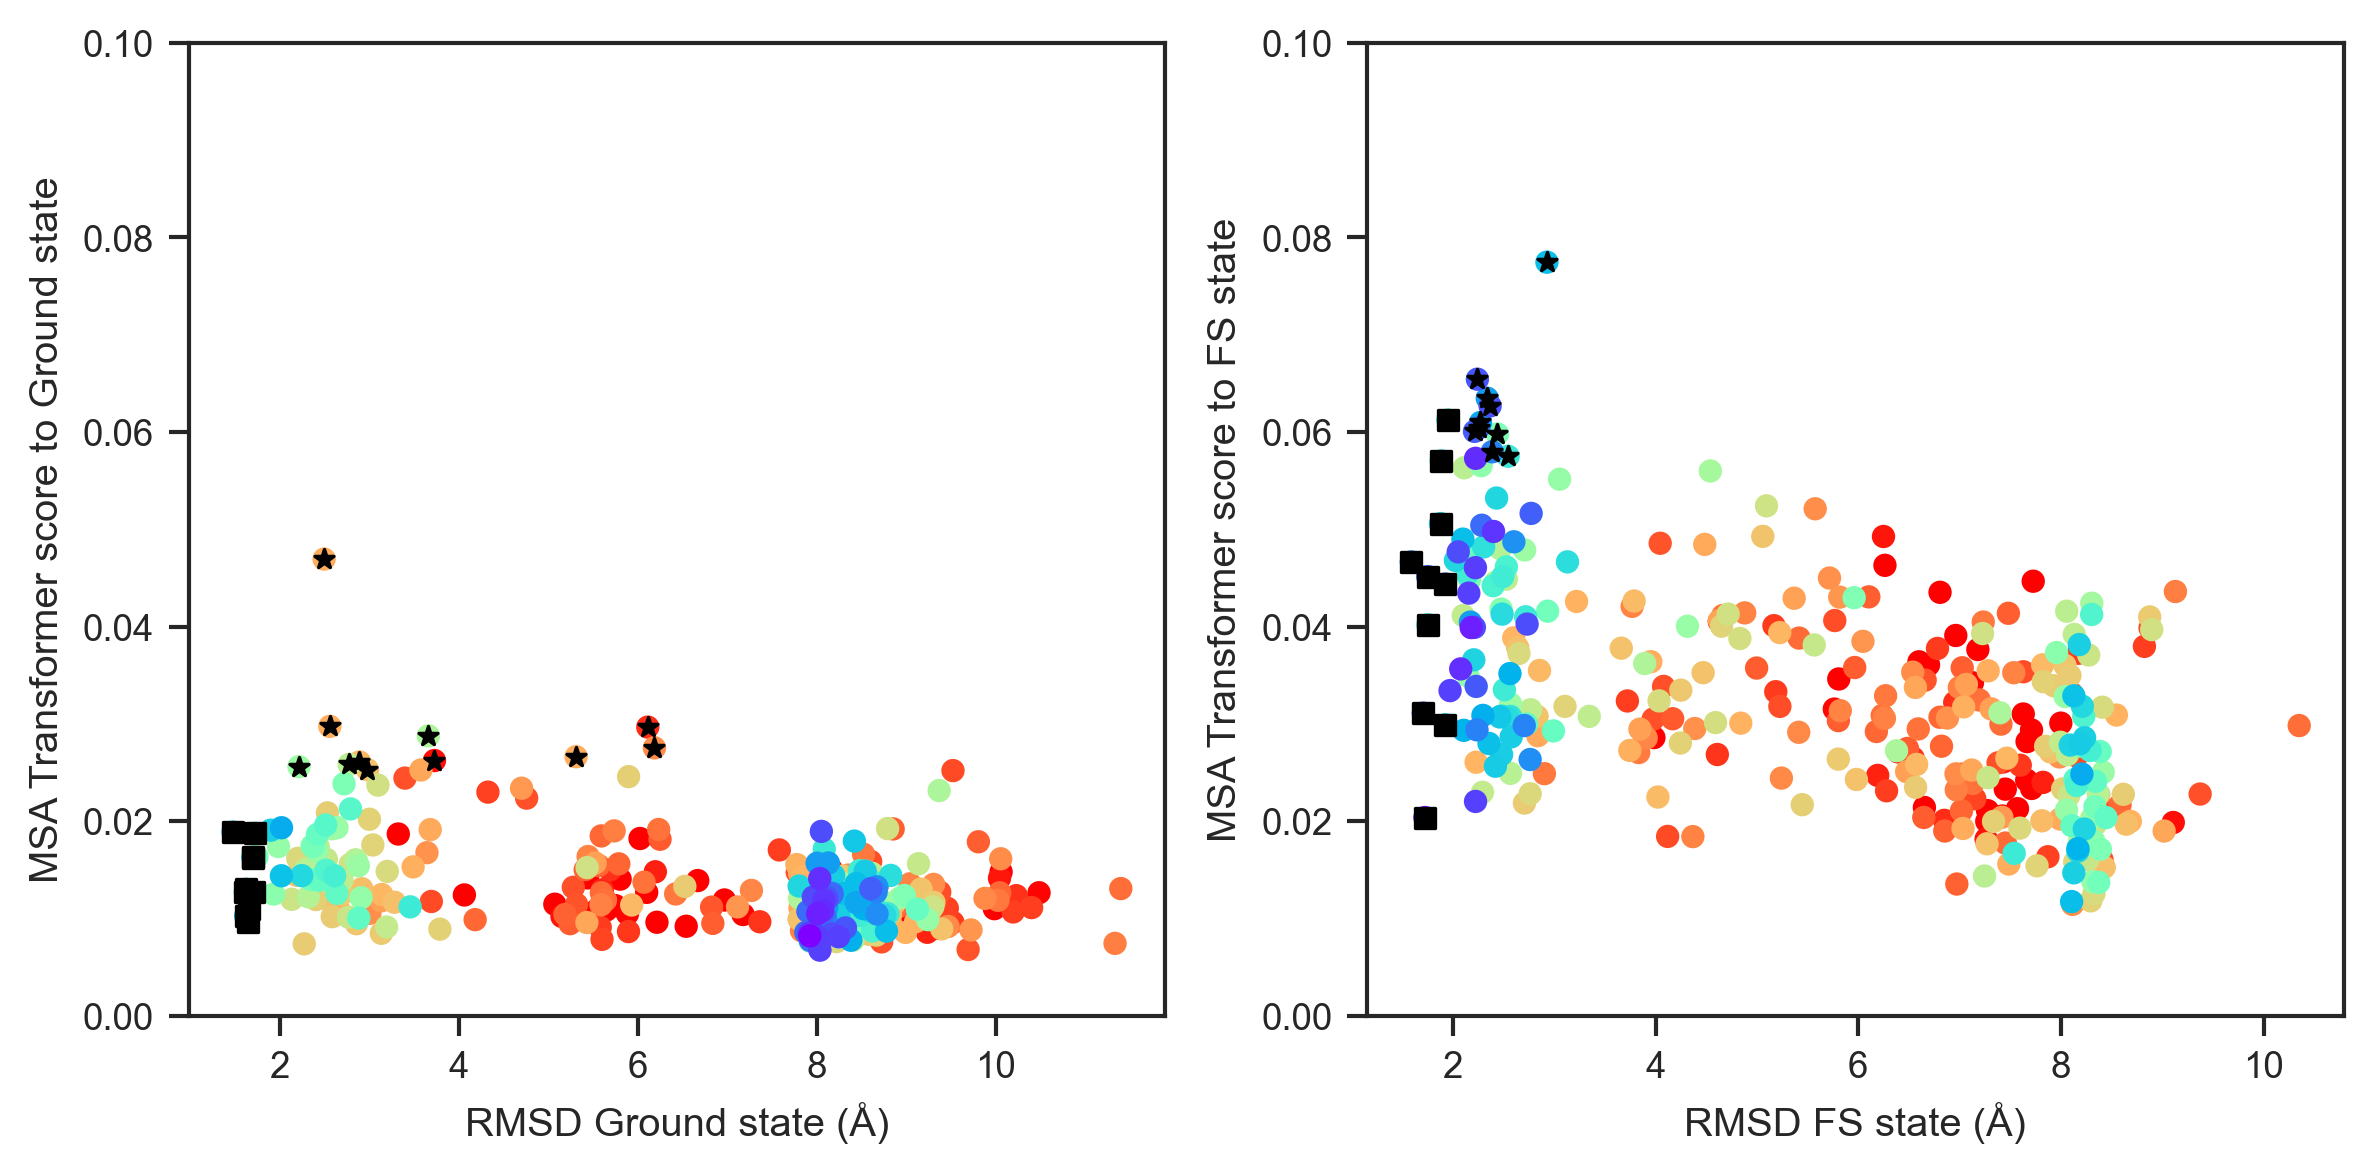

In [90]:
figure(figsize=(8,4))
subplot(1,2,1)
scatter(tree_df['rmsd_ref_2QKEE']*10, tree_df['contact_map_msaT_2qke_score'],c=tree_df['mean_pLDDT'], cmap='rainbow_r', vmin=50,vmax=90)
xlabel('RMSD Ground state (Å)')
ylabel('MSA Transformer score to Ground state')

tmp=tree_df.sort_values('contact_map_msaT_2qke_score').iloc[-11:]
scatter(tmp['rmsd_ref_2QKEE']*10, tmp['contact_map_msaT_2qke_score'],color='k', marker='*')

tmp=tree_df.sort_values('rmsd_ref_2QKEE').iloc[:10]
scatter(tmp['rmsd_ref_2QKEE']*10, tmp['contact_map_msaT_2qke_score'],color='k', marker='s')

ylim([0,0.1])

subplot(1,2,2)

scatter(tree_df['rmsd_ref_5JYTA']*10, tree_df['contact_map_msaT_5jyt_score'],c=tree_df['mean_pLDDT'], cmap='rainbow_r', vmin=50,vmax=90)
xlabel('RMSD FS state (Å)')
ylabel('MSA Transformer score to FS state')
ylim([0,0.1])

tmp=tree_df.sort_values('contact_map_msaT_5jyt_score').iloc[-11:]
scatter(tmp['rmsd_ref_5JYTA']*10, tmp['contact_map_msaT_5jyt_score'],color='k', marker='*')

tmp=tree_df.sort_values('rmsd_ref_5JYTA').iloc[:10]
scatter(tmp['rmsd_ref_5JYTA']*10, tmp['contact_map_msaT_5jyt_score'],color='k', marker='s')

tight_layout()
savefig('compare_AF2_RMSD_and_MSA_transformer_signal.pdf',bbox_inches='tight')

In [15]:
 # get representative clusters of first and second state
state_1 = tree_df.loc[tree_df['rmsd_ref_5JYTA']<0.3]
print(len(state_1))

state_2 = tree_df.loc[tree_df['rmsd_ref_2QKEE']<0.3]
print(len(state_2))

bkgd = tree_df.loc[tree_df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]

state_1['state'] = 'FS state'
state_2['state'] = 'Ground state'
bkgd['state'] = 'Other'

tree_df = pd.concat([state_1, state_2, bkgd])


90
66


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_81485/1575777482.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bkgd = tree_df.loc[tree_df['rmsd_ref_2QKEE']>=0.3][df['rmsd_ref_5JYTA']>=0.3]
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_81485/1575777482.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_1['state'] = 'FS state'
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_81485/1575777482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

Ttest_indResult(statistic=-7.6244556290044985, pvalue=4.563039327696137e-13)
Ttest_indResult(statistic=6.178352602530532, pvalue=2.798798731424616e-09)


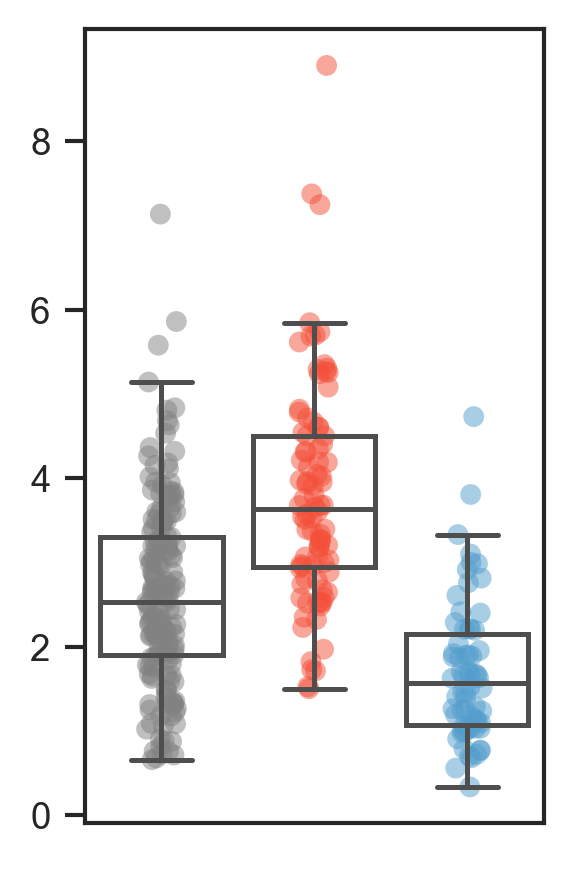

In [41]:
figure(figsize=(2,3))
ylabel('Ratio to FS or ground state of MSA Transformer contact map')
jitterbox(x='state', y='score_ratio', data=tree_df,order=['Other', 'FS state', 'Ground state'], palette=[grey, red, blue])
#title('MSA Transformer prediction for clusters\n<-ground state                    FS state->')
ylabel('')
xticks([])
xlabel('')
print(ttest_ind(tree_df.loc[tree_df.state=='Other']['score_ratio'], tree_df.loc[tree_df.state=='FS state']['score_ratio']))
print(ttest_ind(tree_df.loc[tree_df.state=='Other']['score_ratio'], tree_df.loc[tree_df.state=='Ground state']['score_ratio']))
tight_layout()
#savefig('MSA_transformer_score.pdf',bbox_inches='tight')

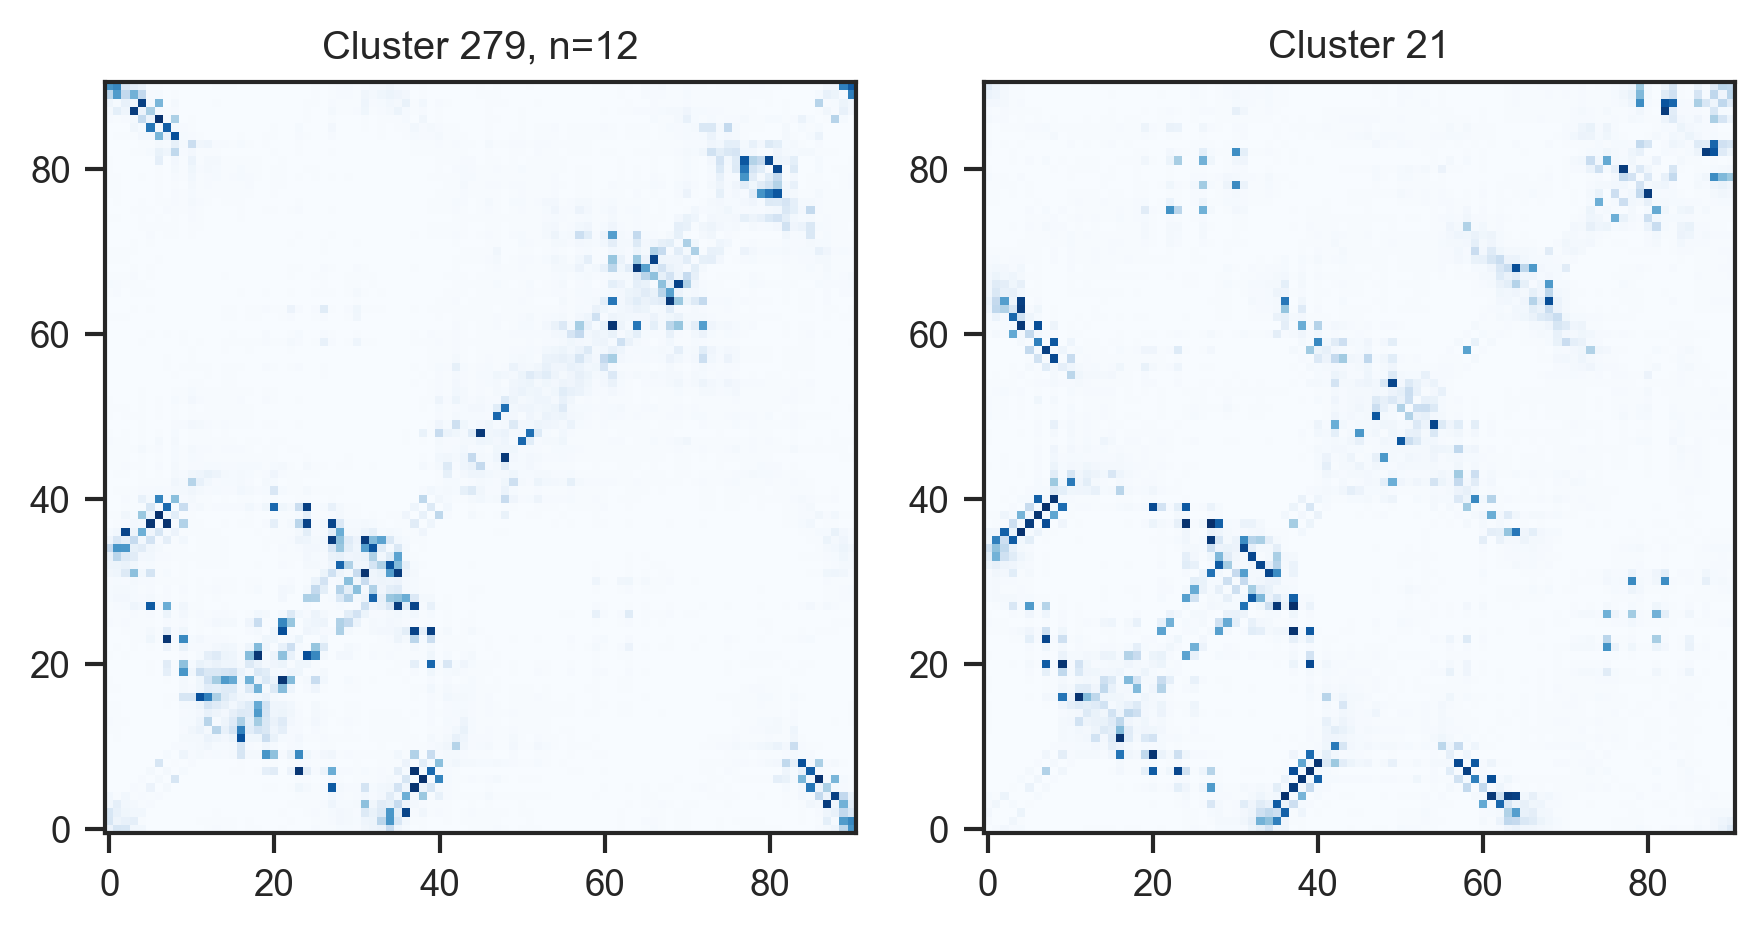

In [54]:
figure(figsize=(6,3))
subplot(1,2,1)
row=tree_df.sort_values('score_ratio').iloc[0]
title('Cluster 279, n=12')
imshow(row['msaT_arr'],origin='lower', cmap='Blues')

subplot(1,2,2)
row=tree_df.sort_values('score_ratio').iloc[-1]
imshow(row['msaT_arr'],origin='lower', cmap='Blues')
title('Cluster 21')
tight_layout()

#savefig('example_msa_transformer_plots.pdf',bbox_inches='tight')

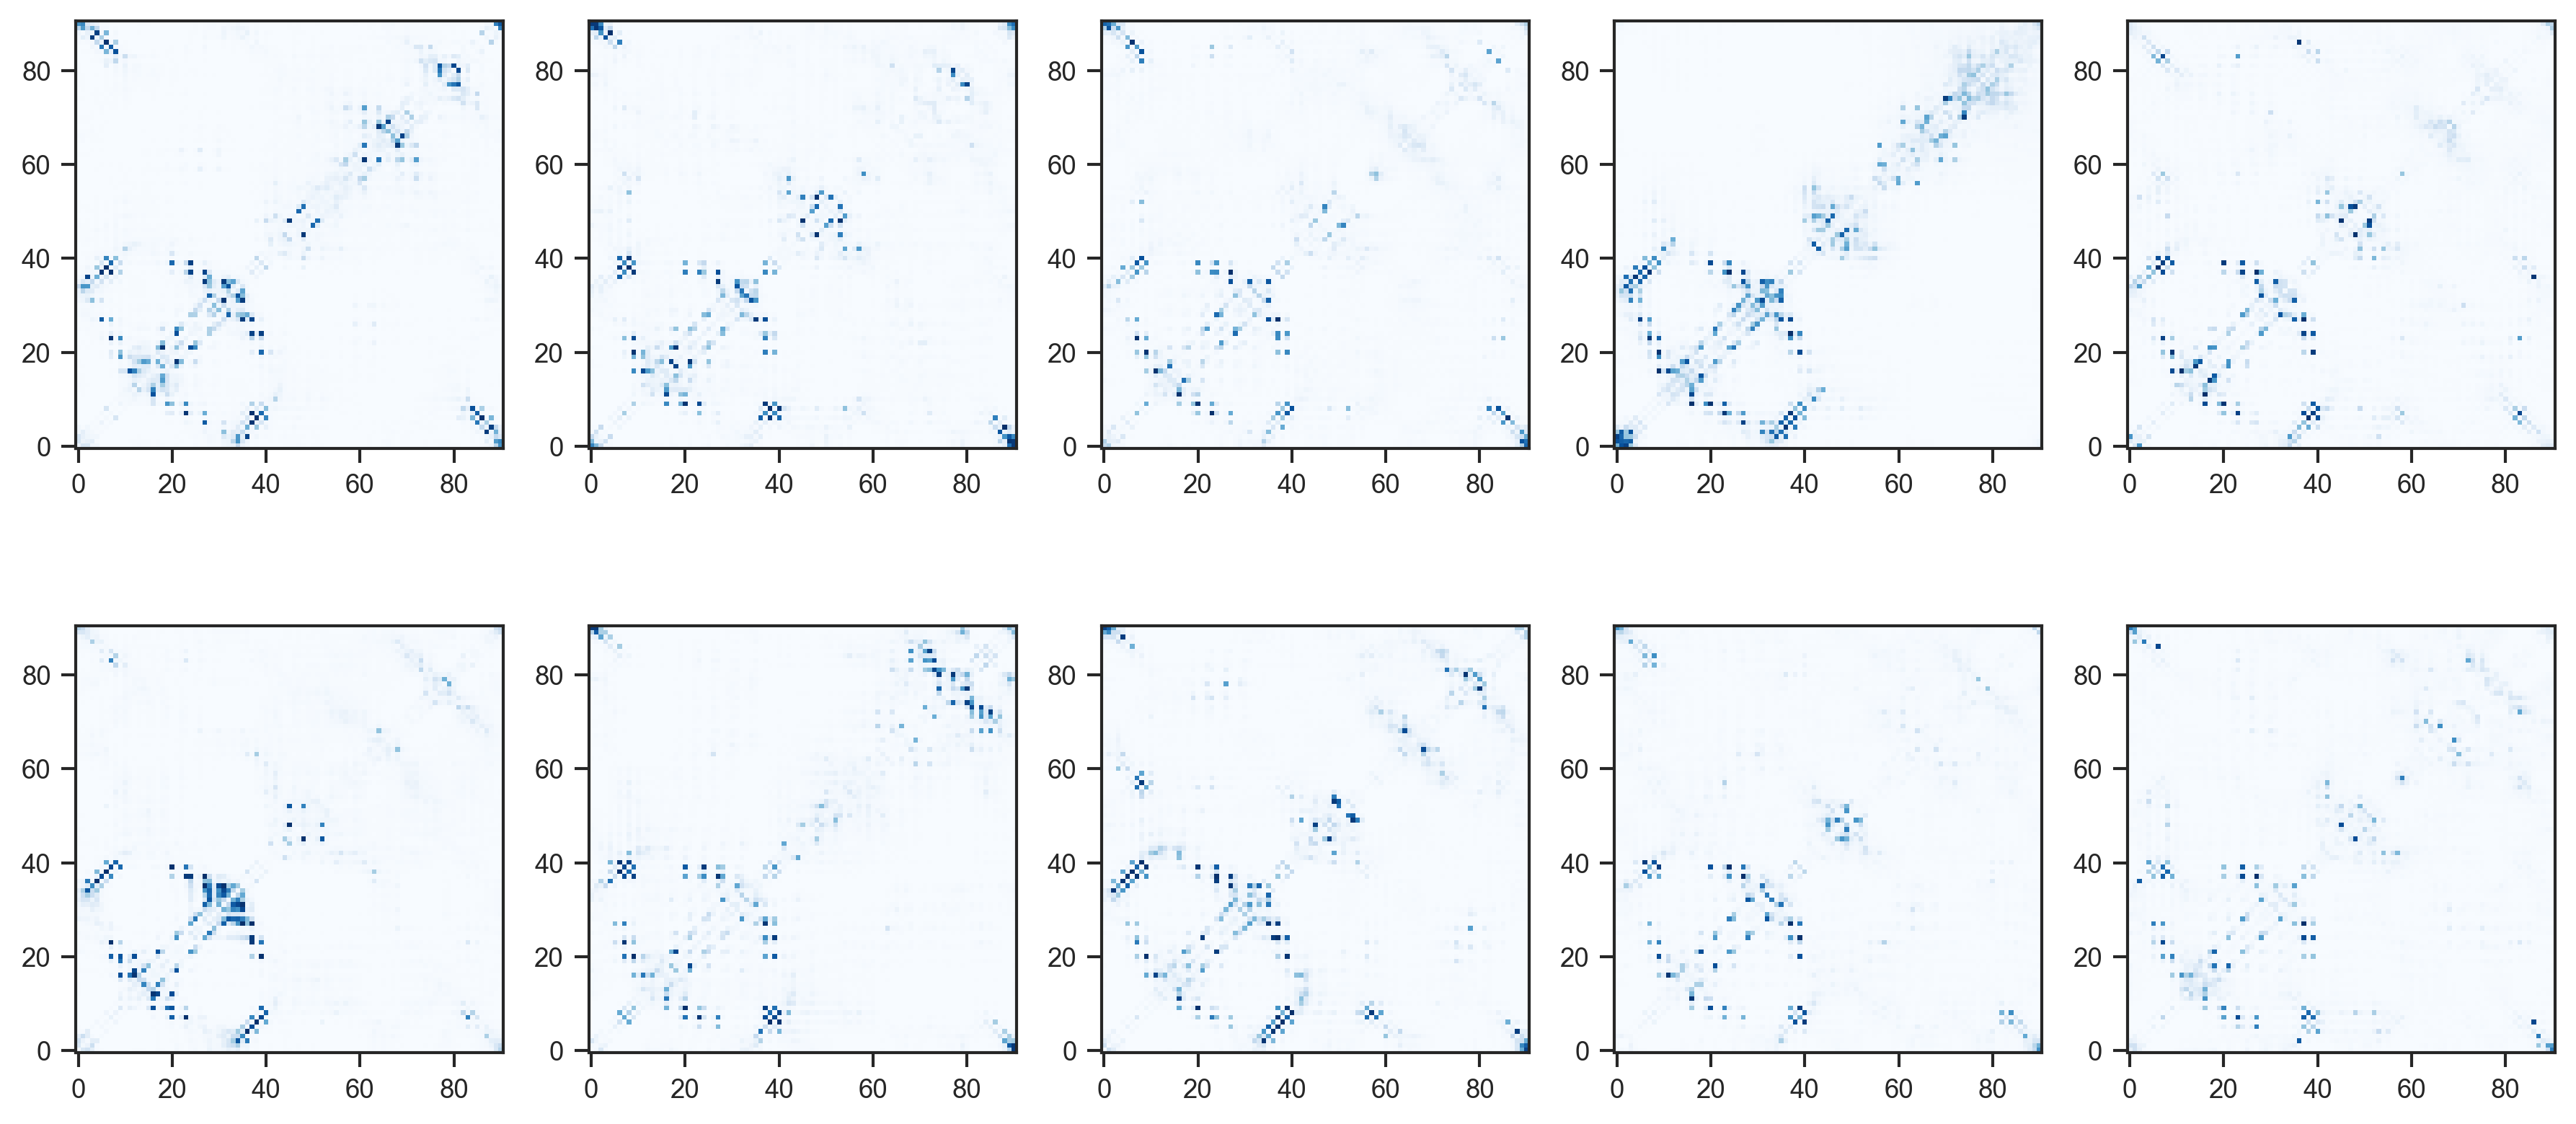

In [67]:
figure(figsize=(12,6))

for i in range(1,11):
    subplot(2,5,i)
    row=tree_df.sort_values('contact_map_msaT_2qke_score').iloc[-1*i]
    imshow(row['msaT_arr'],origin='lower', cmap='Blues')

tight_layout()
savefig('top10_Ground_state_score_maps.pdf',bbox_inches='tight')

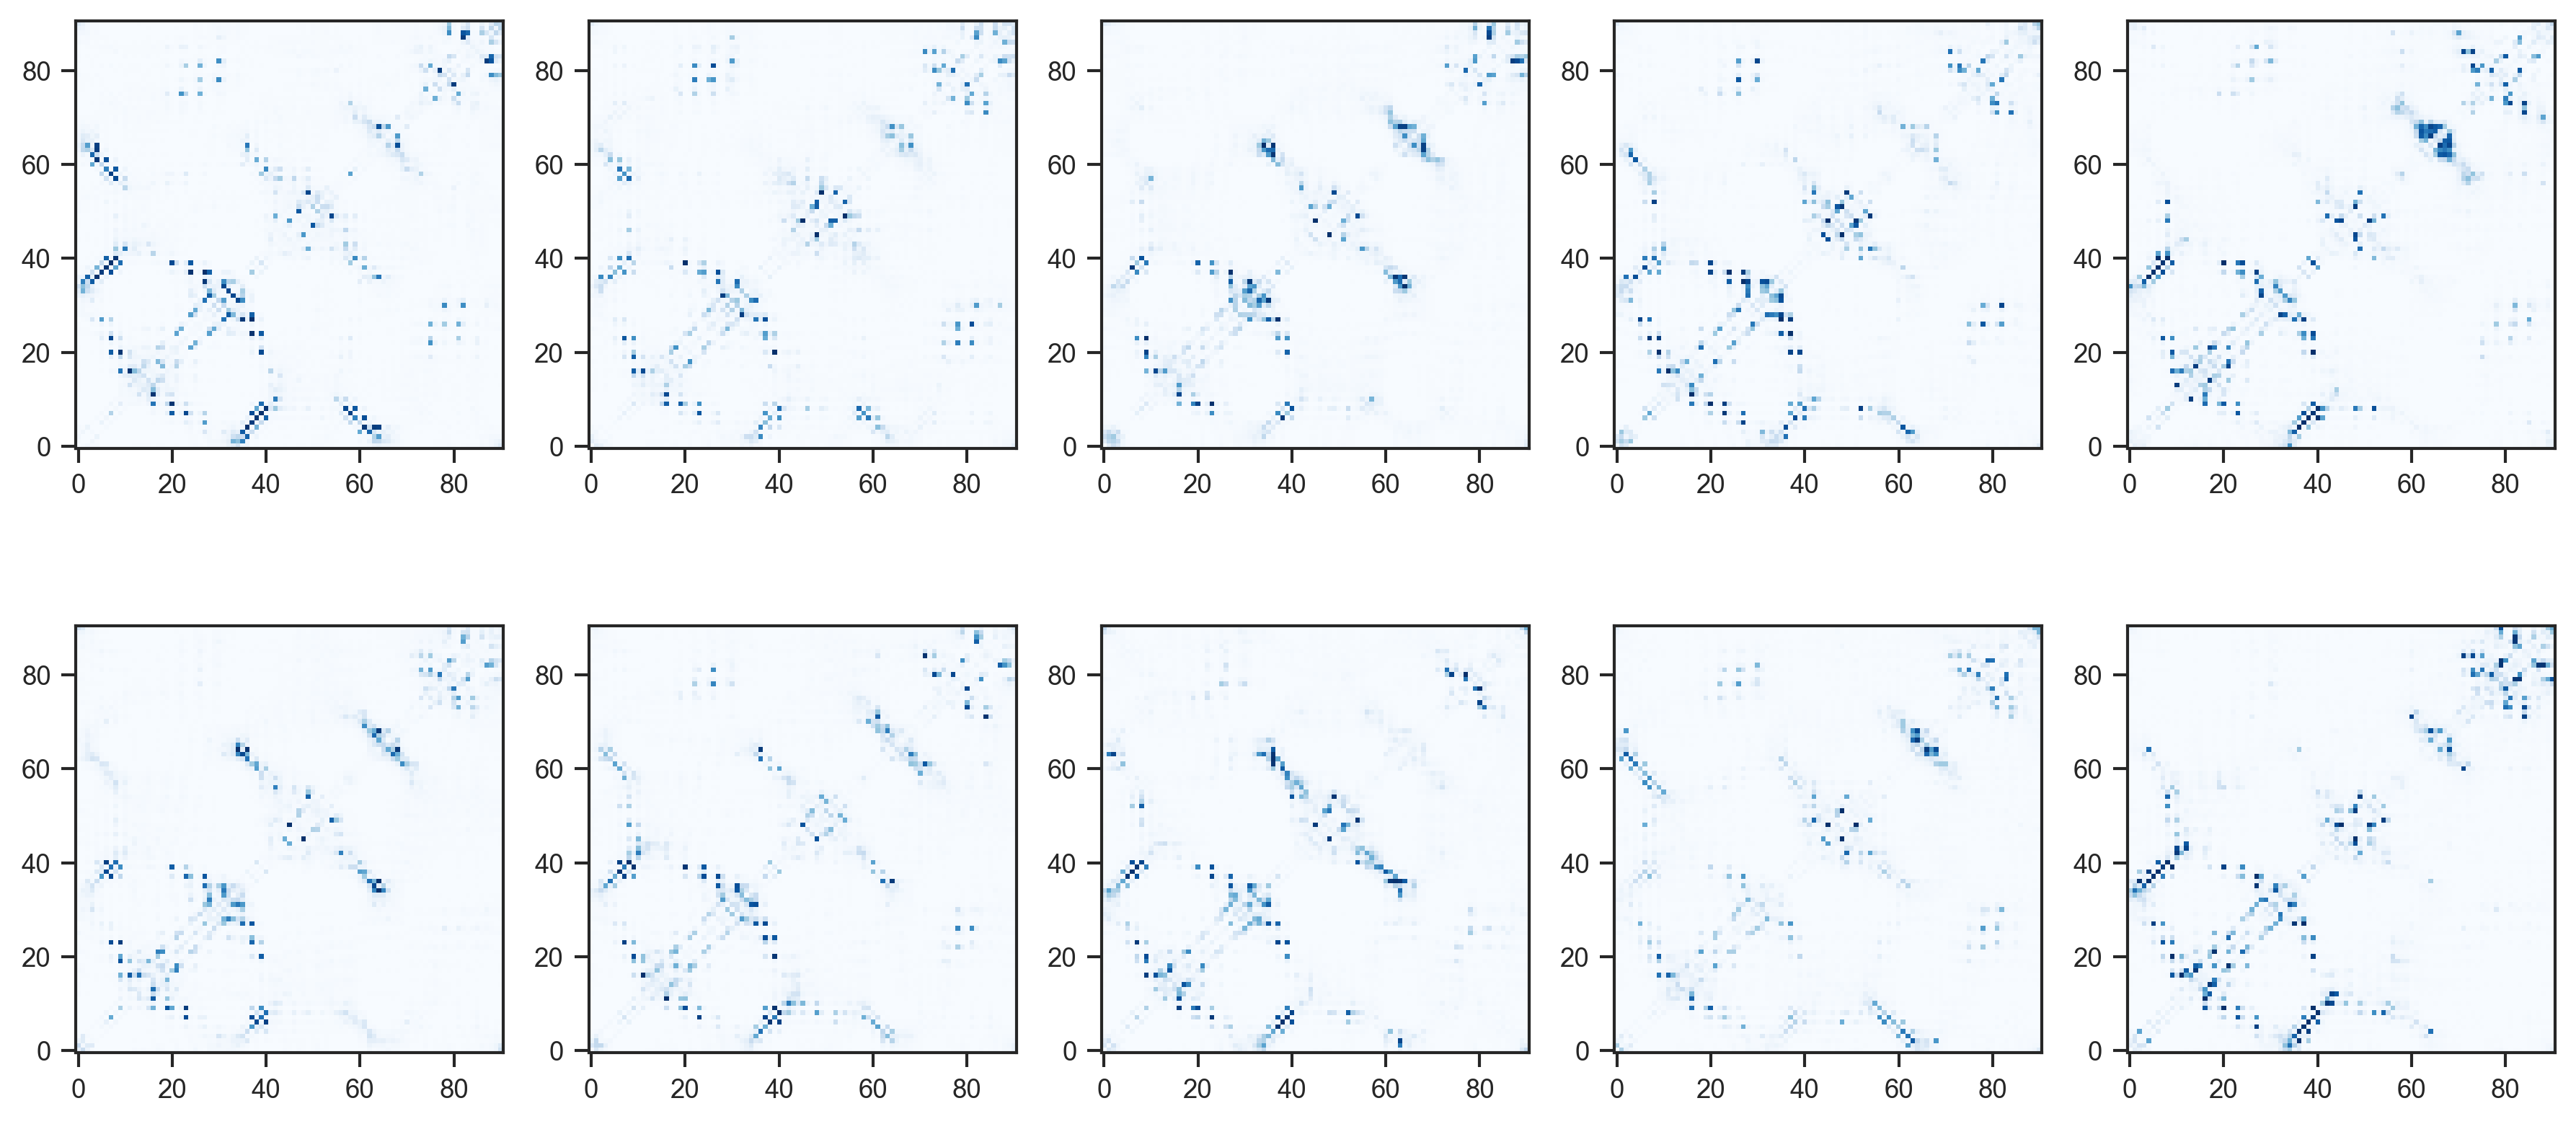

In [70]:
figure(figsize=(12,6))

for i in range(1,11):
    subplot(2,5,i)
    row=tree_df.sort_values('contact_map_msaT_5jyt_score').iloc[-1*i]
    imshow(row['msaT_arr'],origin='lower', cmap='Blues')

tight_layout()
savefig('top10_FS_state_score_maps.pdf',bbox_inches='tight')

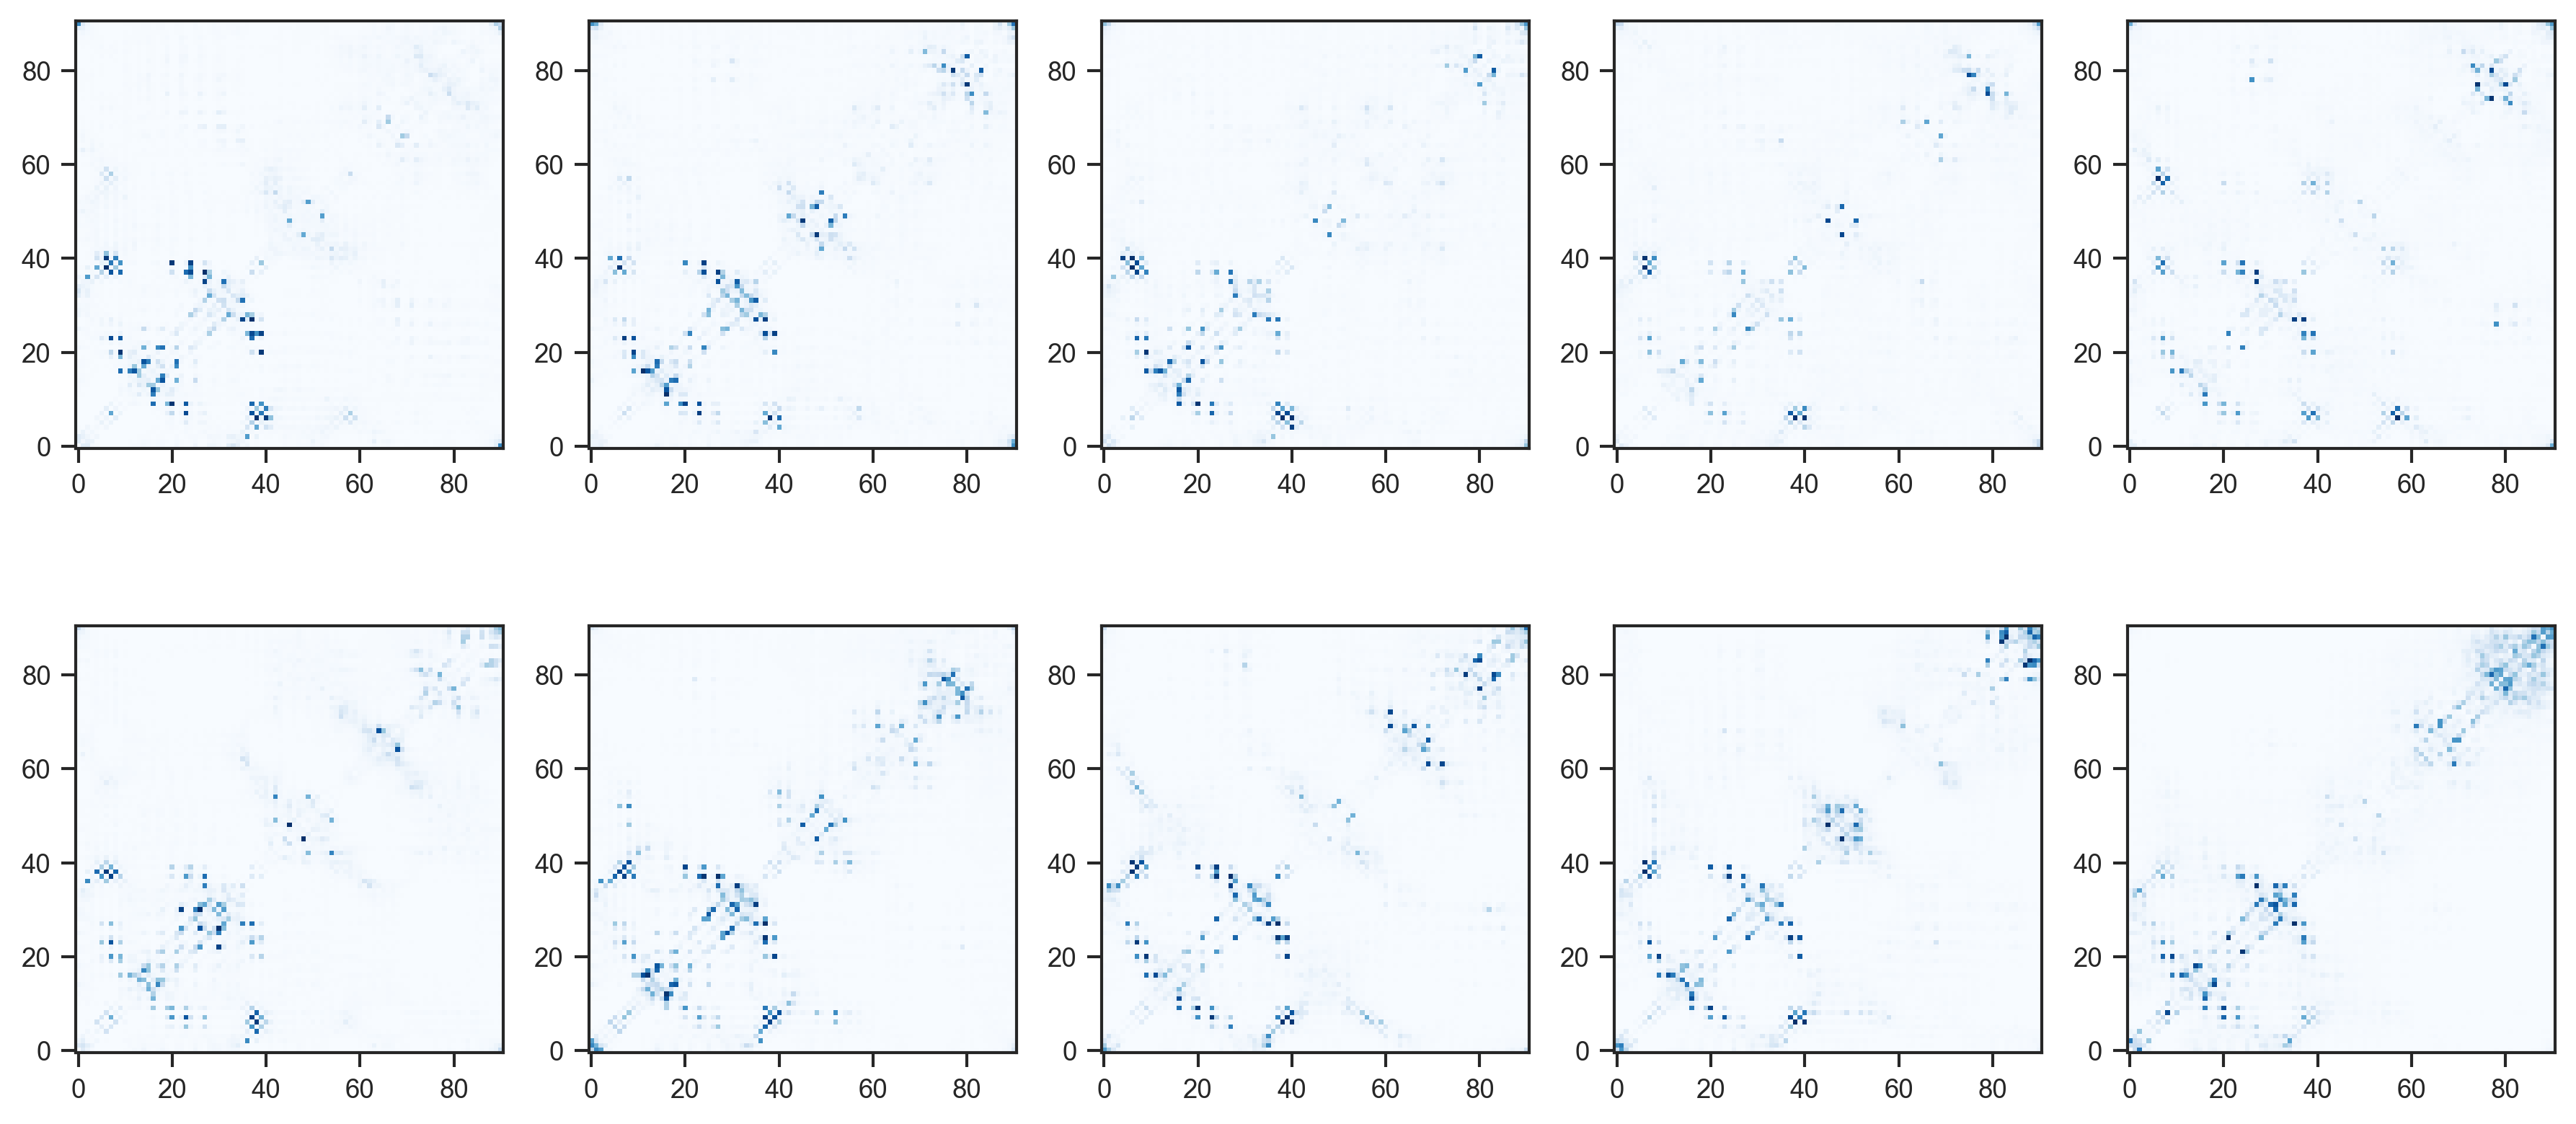

In [68]:
figure(figsize=(12,6))

for i in range(10):
    subplot(2,5,i+1)
    row=tree_df.sort_values('rmsd_ref_2QKEE').iloc[i]
    imshow(row['msaT_arr'],origin='lower', cmap='Blues')

tight_layout()
savefig('top10_Ground_state_RMSD_maps.pdf',bbox_inches='tight')

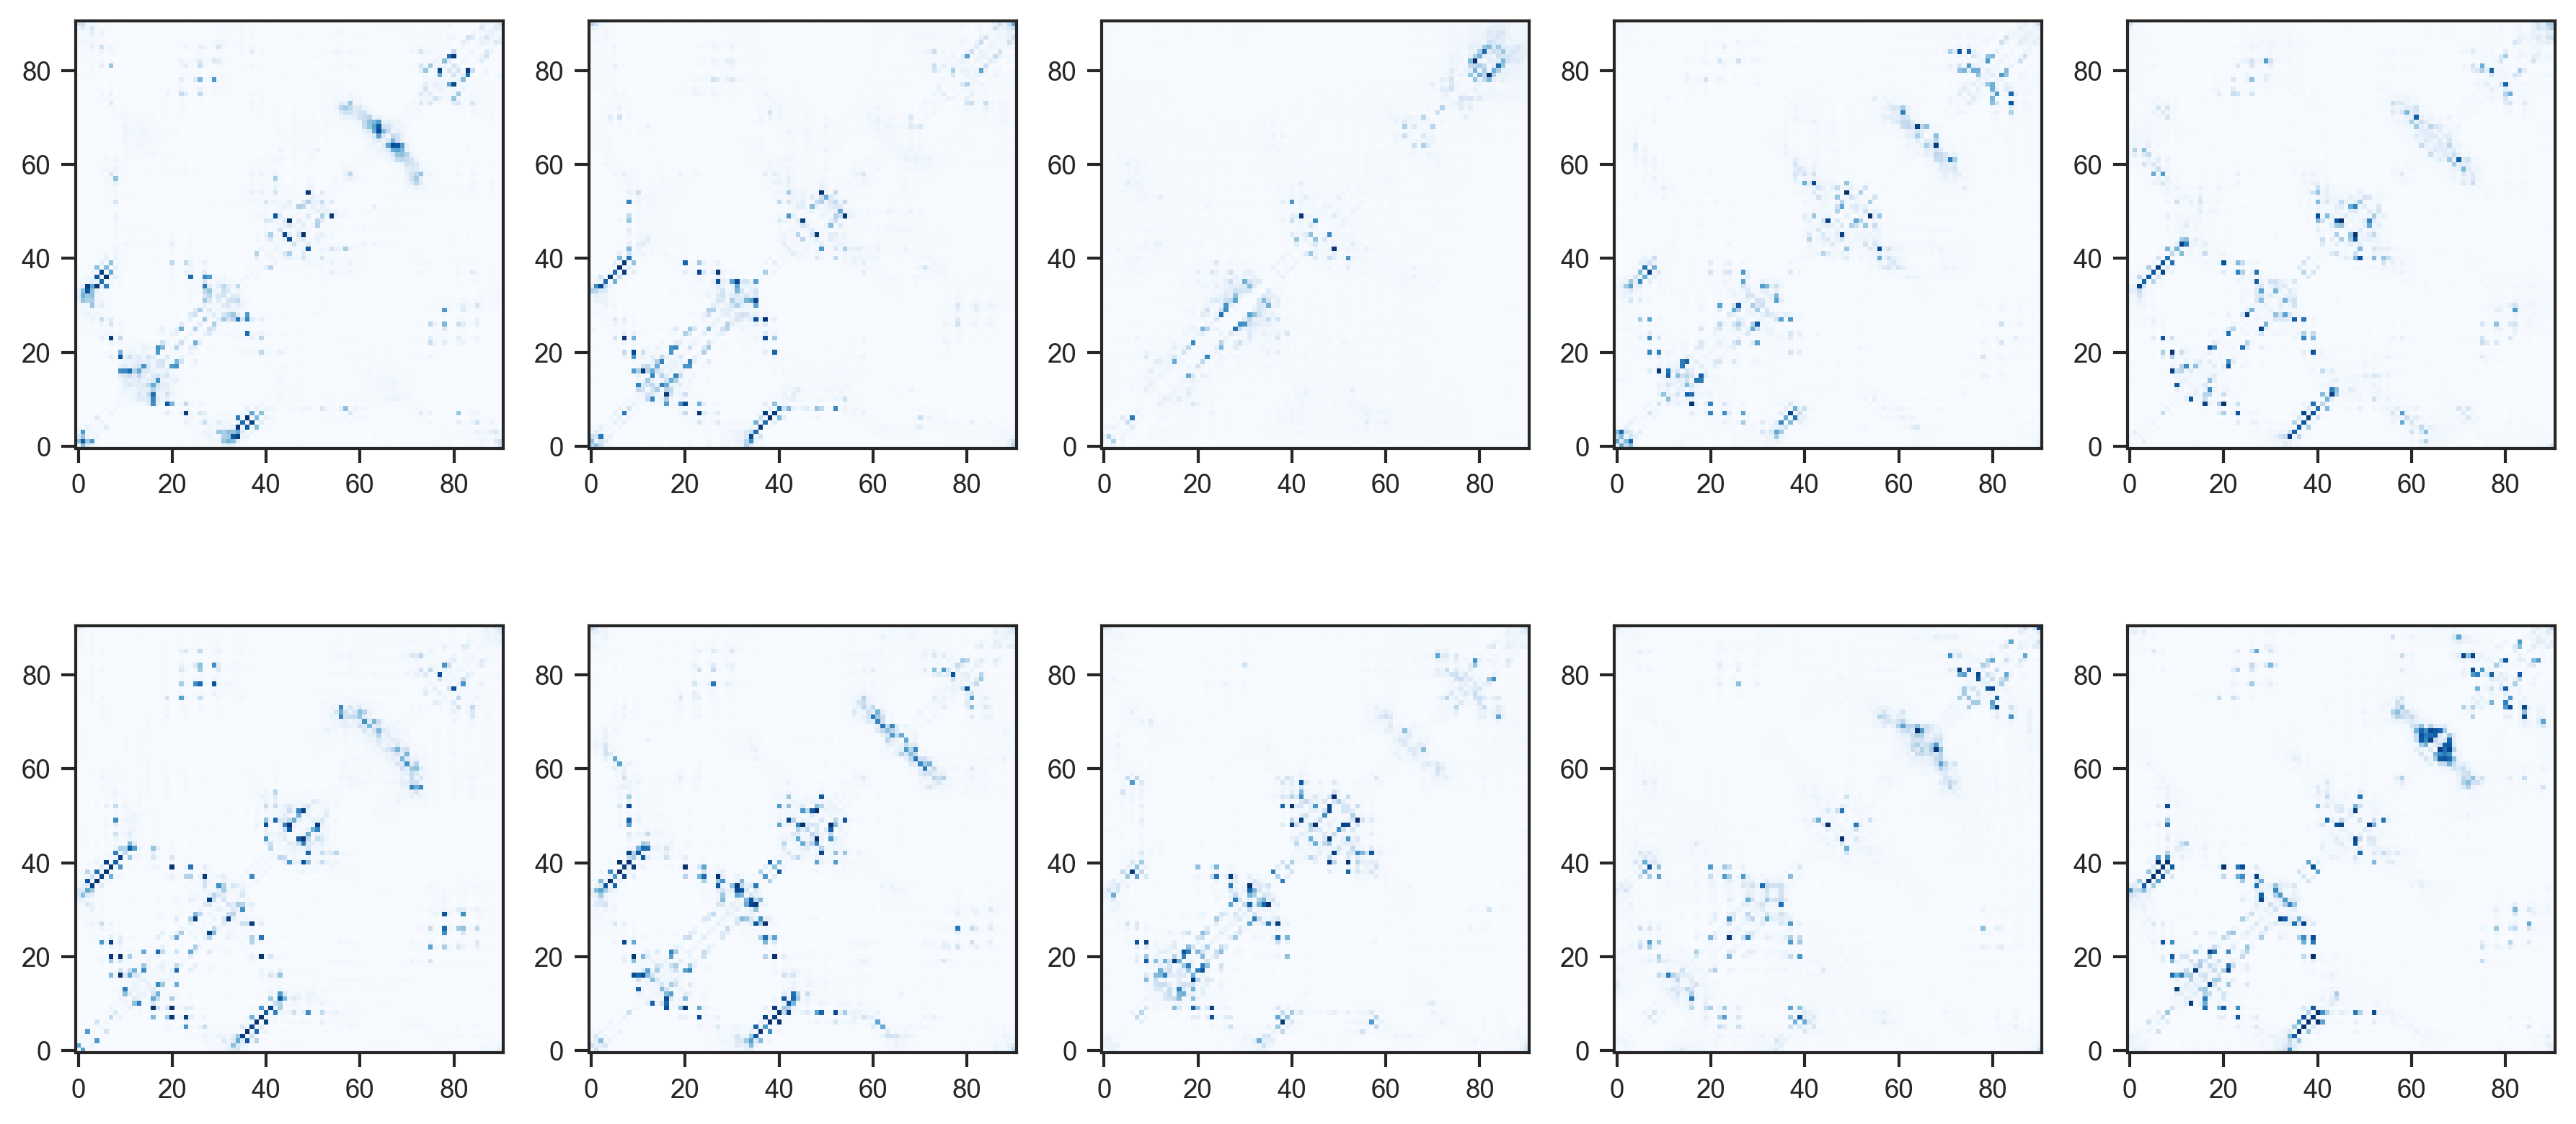

In [69]:
figure(figsize=(12,6))

for i in range(10):
    subplot(2,5,i+1)
    row=tree_df.sort_values('rmsd_ref_5JYTA').iloc[i]
    imshow(row['msaT_arr'],origin='lower', cmap='Blues')

tight_layout()
savefig('top10_FS_state_RMSD_maps.pdf',bbox_inches='tight')

In [48]:
tree_df.sort_values('rmsd_ref_2QKEE')

,pdb,Type,pLDDT_vector,mean_pLDDT,dssp_string,rmsd_ref_2QKEE,dist_dssp_2QKEE,rmsd_ref_5JYTA,dist_dssp_5JYTA,PC 1,PC 2,PC 3,PC 4,PC 5,cluster_ind,msaT_arr,contact_map_msaT_2qke_score,contact_map_msaT_5jyt_score,score_ratio,state
102,preds_3r/2QKEE_184.pdb,Tree,"[59.38, 62.07, 73.78, 78.8, 82.89, 84.74, 85.5...",77.628462,CCCEEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCCC...,0.147356,12,0.822986,29,33.501541,-14.316513,6.065811,-3.140414,6.765184,184,"[[0.003696921980008483, 0.10846026241779327, 0...",0.018886,0.019193,1.016293,Ground state
8,preds_3r/2QKEE_08.pdb,Tree,"[52.23, 57.31, 77.91, 82.46, 84.44, 86.22, 85....",77.807802,CCCEEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCCC...,0.161156,15,0.809196,31,33.383076,-14.493143,6.109185,-2.129766,6.295173,08,"[[0.042615264654159546, 0.04204336181282997, 0...",0.012685,0.027824,2.193438,Ground state
280,preds_3r/2QKEE_51.pdb,Tree,"[58.62, 65.33, 81.55, 84.29, 86.78, 87.94, 87....",79.954945,CCCEEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCCC...,0.161599,14,0.816733,28,33.359280,-14.556064,6.053071,-2.438567,6.885210,51,"[[0.04199457913637161, 0.1768297255039215, 0.0...",0.010276,0.017181,1.671938,Ground state
229,preds_3r/2QKEE_29.pdb,Tree,"[58.98, 64.15, 79.58, 81.61, 83.48, 85.98, 86....",79.364835,CCCEEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCCC...,0.162265,17,0.810515,27,32.901516,-14.488208,6.411175,-3.206805,6.543961,29,"[[0.011448056437075138, 0.10666818916797638, 0...",0.013001,0.011736,0.902716,Ground state
261,preds_3r/2QKEE_32.pdb,Tree,"[53.44, 55.8, 74.02, 80.76, 83.36, 85.64, 85.7...",78.149560,CCCEEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCCC...,0.164073,14,0.818571,28,33.580894,-14.750066,6.769501,-1.681558,7.266953,32,"[[0.08161270618438721, 0.0831783264875412, 0.0...",0.009592,0.027955,2.914491,Ground state
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,preds_3r/2QKEE_322.pdb,Tree,"[34.12, 40.92, 41.86, 49.53, 48.66, 52.5, 50.5...",52.602857,CCCCEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCCCCCCCCHHHC...,1.023147,40,0.654069,25,13.496309,3.339482,0.822619,32.316040,-3.092010,322,"[[0.10605601221323013, 0.09621448069810867, 0....",0.012345,0.026495,2.146267,Other
19,preds_3r/2QKEE_109.pdb,Tree,"[44.24, 47.15, 53.82, 51.91, 56.89, 58.59, 62....",53.196813,CCCEEEEEEECCCCCHHHHHHHHHHHHHHHHHCCCEEEEEEECCCC...,1.040256,28,0.882336,16,23.298380,32.369511,-7.821206,1.758475,20.100618,109,"[[0.002884093439206481, 0.08444070816040039, 0...",0.011119,0.037970,3.414911,Other
11,preds_3r/2QKEE_101.pdb,Tree,"[39.61, 40.98, 43.24, 44.86, 44.66, 49.57, 48....",50.232527,CCCCCEEEEEECCCCCCHHHHHHHHHHHHHHHCCCCCCCECCCCCC...,1.048544,31,0.712651,31,13.085224,3.014554,0.227067,32.312767,-0.873385,101,"[[0.3666616976261139, 0.4139035940170288, 0.34...",0.012645,0.034231,2.707095,Other
17,preds_3r/2QKEE_107.pdb,Tree,"[44.29, 46.25, 52.45, 54.66, 58.74, 63.96, 65....",56.574615,CCCEEEEEEECCCCHHHHHHHHHHHHHHHHHCCCCEEEEEEECCCC...,1.133498,30,0.912935,11,11.417652,22.242489,-3.630596,0.180398,14.269285,107,"[[0.0024792300537228584, 0.05624527856707573, ...",0.007441,0.043607,5.860573,Other


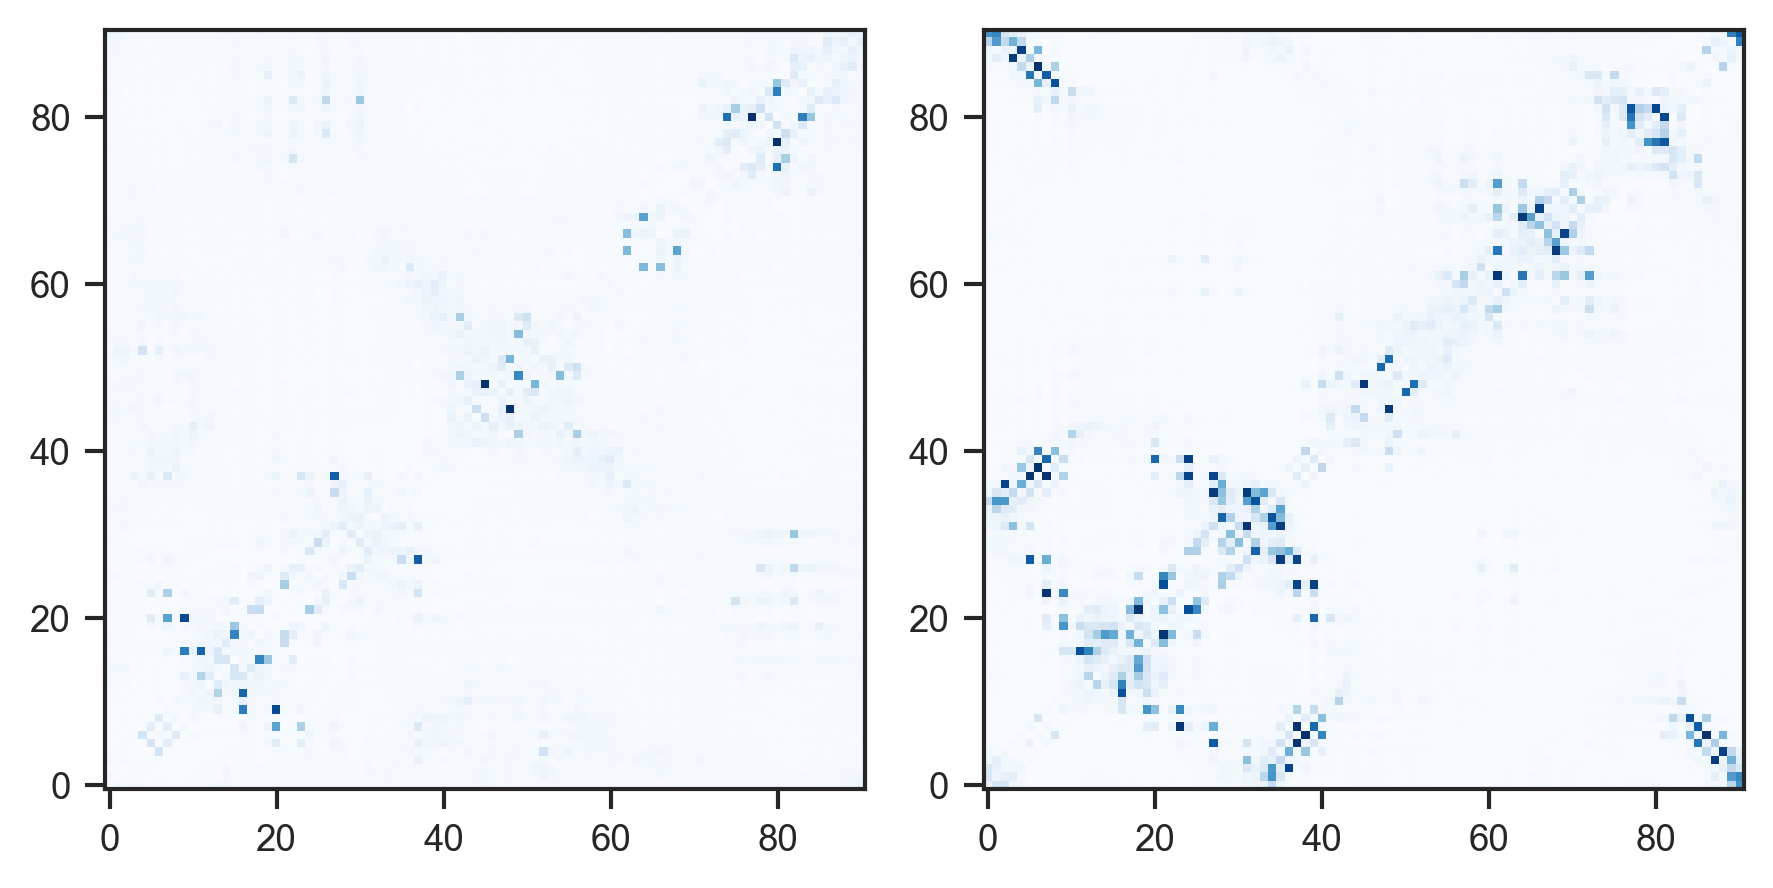

In [44]:
figure(figsize=(6,3))
subplot(1,2,1)
row=tree_df.sort_values('contact_map_msaT_2qke_score').iloc[0]
imshow(row['msaT_arr'],origin='lower', cmap='Blues')

subplot(1,2,2)
row=tree_df.sort_values('contact_map_msaT_2qke_score').iloc[-1]
imshow(row['msaT_arr'],origin='lower', cmap='Blues')
tight_layout()

#savefig('example_msa_transformer_plots.pdf',bbox_inches='tight')

In [25]:
# To get top n models by plDDT, Ground state
n=5

print('Ground state')
for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_2QKEE']<0.3].sort_values('mean_pLDDT', ascending=False)[:n].iterrows():
    print(row['pdb'])

print('FS state')
for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_5JYTA']<0.3].sort_values('mean_pLDDT', ascending=False)[:5].iterrows():
    print(row['pdb'])

Ground state
preds_3r/2QKEE_172.pdb
preds_3r/2QKEE_51.pdb
preds_3r/2QKEE_29.pdb
preds_3r/2QKEE_30.pdb
preds_3r/2QKEE_32.pdb
FS state
preds_3r/2QKEE_150.pdb
preds_3r/2QKEE_16.pdb
preds_3r/2QKEE_271.pdb
preds_3r/2QKEE_33.pdb
preds_3r/2QKEE_01.pdb


/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/365106609.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_2QKEE']<0.3].sort_values('mean_pLDDT', ascending=False)[:n].iterrows():
/var/folders/dz/yxswm4nd5gn8qr7s1_h0x71r0000gn/T/ipykernel_69540/365106609.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for _, row in df.loc[df.Type=='Tree'][df['rmsd_ref_5JYTA']<0.3].sort_values('mean_pLDDT', ascending=False)[:5].iterrows():
